<a href="https://colab.research.google.com/github/Valerie0518/LQY/blob/main/Tesco-Trustpilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4
import re
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

In [13]:
def scrape_page(url):
    """抓取单个页面并返回文本内容."""
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup.get_text(strip=True)

def scrape_all_pages(base_url, max_pages=10):
    """抓取所有页面并返回所有文本内容."""
    all_text = ""
    for page_num in range(1, max_pages + 1):
        url = f"{base_url}?page={page_num}"  # 构建分页 URL
        page_text = scrape_page(url)

        # 检查页面是否为空或重复，如果是则停止抓取
        if not page_text or page_text in all_text:
            break

        all_text += page_text
        print(f"已抓取页面 {page_num}")  # 可选：打印进度

    return all_text

# 设置基本 URL 和最大页数
base_url = "https://www.trustpilot.com/review/www.tesco.com"
max_pages = 100

# 抓取所有页面
all_text = scrape_all_pages(base_url, max_pages)

# 可选：将文本保存到文件
with open("all_text_from_all_pages.txt", "w", encoding="utf-8") as f:
    f.write(all_text)

已抓取页面 1
已抓取页面 2
已抓取页面 3
已抓取页面 4
已抓取页面 5
已抓取页面 6
已抓取页面 7
已抓取页面 8
已抓取页面 9
已抓取页面 10
已抓取页面 11
已抓取页面 12
已抓取页面 13
已抓取页面 14
已抓取页面 15
已抓取页面 16
已抓取页面 17
已抓取页面 18
已抓取页面 19
已抓取页面 20
已抓取页面 21
已抓取页面 22
已抓取页面 23
已抓取页面 24
已抓取页面 25
已抓取页面 26
已抓取页面 27
已抓取页面 28
已抓取页面 29
已抓取页面 30
已抓取页面 31
已抓取页面 32
已抓取页面 33
已抓取页面 34
已抓取页面 35
已抓取页面 36
已抓取页面 37
已抓取页面 38
已抓取页面 39
已抓取页面 40
已抓取页面 41
已抓取页面 42
已抓取页面 43
已抓取页面 44
已抓取页面 45
已抓取页面 46
已抓取页面 47
已抓取页面 48
已抓取页面 49
已抓取页面 50
已抓取页面 51
已抓取页面 52
已抓取页面 53
已抓取页面 54
已抓取页面 55
已抓取页面 56
已抓取页面 57
已抓取页面 58
已抓取页面 59
已抓取页面 60
已抓取页面 61
已抓取页面 62
已抓取页面 63
已抓取页面 64
已抓取页面 65
已抓取页面 66
已抓取页面 67
已抓取页面 68
已抓取页面 69
已抓取页面 70
已抓取页面 71
已抓取页面 72
已抓取页面 73
已抓取页面 74
已抓取页面 75
已抓取页面 76
已抓取页面 77
已抓取页面 78
已抓取页面 79
已抓取页面 80
已抓取页面 81
已抓取页面 82
已抓取页面 83
已抓取页面 84
已抓取页面 85
已抓取页面 86
已抓取页面 87
已抓取页面 88
已抓取页面 89
已抓取页面 90
已抓取页面 91
已抓取页面 92
已抓取页面 93
已抓取页面 94
已抓取页面 95
已抓取页面 96
已抓取页面 97
已抓取页面 98
已抓取页面 99
已抓取页面 100


In [16]:
keywords = ["delivery", "customer service", "quality", "mislead", "refund"]
frequencies = []
chart = {}
for keyword in keywords:
    frequency = all_text.lower().count(keyword.lower())
    frequencies.append(frequency)
    chart[keyword] = frequency


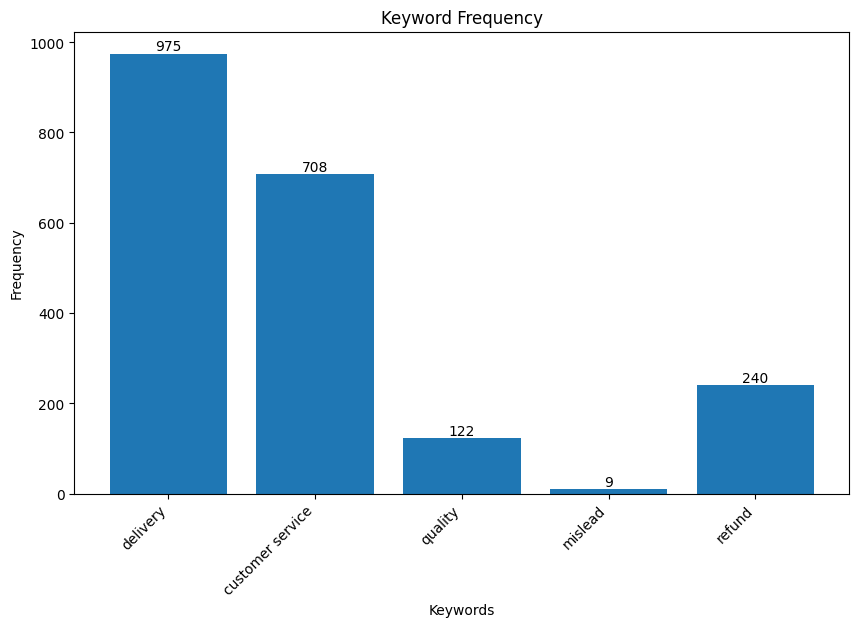

In [17]:
keyword = list(chart.keys())
frequencies = list(chart.values())

# 创建条形图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.bar(keyword, frequencies)

# 在每个条形图上添加总数
for i, v in enumerate(frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom')

# 设置图表标题和标签
plt.title("Keyword Frequency")
plt.xlabel("Keywords")
plt.ylabel("Frequency")

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 显示图表
plt.show()